In [50]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np

In [51]:
# # len(["Conf", "W-L", 'NetRtg0', 'NetRtg1', 'ORtg0', 'ORtg1', 'DRtg0', 'DRtg1', 'AdjT0', 'AdjT1', 'Luck0', 'Luck1', 'NetRtg_SOS0', 'NetRtg_SOS1', 'ORtg_SOS0', 'ORtg_SOS1', 'DRtg_SOS0', 'DRtg_SOS1', 'NetRtgNCSOS0', 'NetRtgNCSOS1'])
# names = ["NetRtg", "ORtg", "DRtg", "AdjT", "Luck", "NetRtg_SOS", "ORtg_SOS", "DRtg_SOS", "NetRtgNCSOS"]
# asd = []
# for name in names:
#     asd.append(name + "0")
#     asd.append(name + "1")
# print(asd)
# len(["Conf", "W-L", 'NetRtg0', 'NetRtg1', 'ORtg0', 'ORtg1', 'DRtg0', 'DRtg1', 'AdjT0', 'AdjT1', 'Luck0', 'Luck1', 'NetRtg_SOS0', 'NetRtg_SOS1', 'ORtg_SOS0', 'ORtg_SOS1', 'DRtg_SOS0', 'DRtg_SOS1', 'NetRtgNCSOS0', 'NetRtgNCSOS1'])

In [52]:
# i = 1

# r = requests.get("https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2026/data/2009KenPomeroy.html")
# soup = BeautifulSoup(r.content, "html.parser")
# soup.prettify()
# #save file
# with open("kenpom2014.html", "w") as f:
#     f.write(soup.prettify())




In [53]:
# i = 1

# table_rowwise = soup.prettify().split("<tbody>")[1].split("<tr>")

# split_row = table_rowwise[i].split("</td>")
# suffix_row = [row.removesuffix("\n          </span>\n         ") for row in split_row]
# suffix_row
# # value_row = []
# team_name = suffix_row[1].split("\n")[3].removeprefix("           ")
# team_name
# Conf = suffix_row[2].split("\n")[3].removeprefix("           ")
# Conf
# suffix_row[3].split("\n")[2].removeprefix("          ")#3,4,5
# suffix_row[6].split("\n")[-1].removeprefix("           ")#6, 8, 10, 12, 14, 16, 18, 20
# suffix_row[7].split("\n")[-2].removeprefix("          ")#7, 9, 11, 13, 15, 17, 19, 21

In [ ]:
r = requests.get("https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2026/data/2014KenPomeroy.html")
soup = BeautifulSoup(r.content, "html.parser")
soup.prettify()
#save file
with open("kenpom2014.html", "w") as f:
    f.write(soup.prettify())

table_rowwise = soup.prettify().split("<tbody>")[1].split("<tr>")
Df_2014 = pd.DataFrame(columns = ["Conf", "W-L", 'NetRtg0', 'NetRtg1', 'ORtg0', 'ORtg1', 'DRtg0', 'DRtg1', 'AdjT0', 'AdjT1', 'Luck0', 'Luck1', 'NetRtg_SOS0', 'NetRtg_SOS1', 'ORtg_SOS0', 'ORtg_SOS1', 'DRtg_SOS0', 'DRtg_SOS1', 'NetRtgNCSOS0', 'NetRtgNCSOS1'])

for i in range(1, len(table_rowwise)):
    split_row = table_rowwise[i].split("</td>")
    suffix_row = [row.removesuffix("\n          </span>\n         ") for row in split_row]
    value_row = []
    for j in range(2, 22):
        team_name = suffix_row[1].split("\n")[3].removeprefix("           ")
        if j == 2:
            value_row.append(suffix_row[j].split("\n")[3].removeprefix("           "))
        if j in [3,4,5]:
            value_row.append(suffix_row[j].split("\n")[2].removeprefix("          "))
        if j in [6, 8, 10, 12, 14, 16, 18, 20]:
            value_row.append(suffix_row[j].split("\n")[-1].removeprefix("           "))
        if j in [7, 9, 11, 13, 15, 17, 19, 21]:
            value_row.append(suffix_row[7].split("\n")[-2].removeprefix("          "))
    Df_2014.loc[team_name] = value_row
Df_2014


,Conf,W-L,NetRtg0,NetRtg1,ORtg0,ORtg1,DRtg0,DRtg1,AdjT0,AdjT1,Luck0,Luck1,NetRtg_SOS0,NetRtg_SOS1,ORtg_SOS0,ORtg_SOS1,DRtg_SOS0,DRtg_SOS1,NetRtgNCSOS0,NetRtgNCSOS1
Louisville,Amer,31-6,+30.41,118.9,7,88.5,5,88.5,60,88.5,278,88.5,95,88.5,100,88.5,93,88.5,295,88.5
Arizona,P12,33-5,+30.11,116.5,20,86.4,1,86.4,272,86.4,151,86.4,17,86.4,20,86.4,18,86.4,113,86.4
Florida,SEC,36-3,+28.57,116.5,19,88.0,3,88.0,318,88.0,68,88.0,22,88.0,32,88.0,14,88.0,94,88.0
Virginia,ACC,30-7,+26.46,114.8,27,88.3,4,88.3,345,88.3,154,88.3,28,88.3,31,88.3,27,88.3,114,88.3
Wisconsin,B10,30-8,+25.89,122.0,4,96.1,35,96.1,286,96.1,133,96.1,3,96.1,13,96.1,2,96.1,68,96.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Longwood,BSth,8-24,-22.88,95.6,314,118.5,344,118.5,80,118.5,270,118.5,279,118.5,232,118.5,312,118.5,95,118.5
Mississippi Valley St.,SWAC,9-23,-22.93,93.0,338,115.9,335,115.9,5,115.9,156,115.9,338,115.9,346,115.9,257,115.9,35,115.9
Abilene Christian,Slnd,11-20,-23.35,94.0,330,117.3,342,117.3,251,117.3,279,117.3,211,117.3,159,117.3,256,117.3,4,117.3
Presbyterian,BSth,6-26,-25.87,94.2,328,120.0,349,120.0,239,120.0,221,120.0,324,120.0,307,120.0,326,120.0,328,120.0


In [ ]:
r = requests.get("https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2026/data/2009KenPomeroy.html")
soup = BeautifulSoup(r.content, "html.parser")
soup.prettify()
#save file
with open("kenpom2014.html", "w") as f:
    f.write(soup.prettify())

table_rowwise = soup.prettify().split("<tbody>")[1].split("<tr>")
Df_2009 = pd.DataFrame(columns = ["Conf", "W-L", 'NetRtg0', 'NetRtg1', 'ORtg0', 'ORtg1', 'DRtg0', 'DRtg1', 'AdjT0', 'AdjT1', 'Luck0', 'Luck1', 'NetRtg_SOS0', 'NetRtg_SOS1', 'ORtg_SOS0', 'ORtg_SOS1', 'DRtg_SOS0', 'DRtg_SOS1', 'NetRtgNCSOS0', 'NetRtgNCSOS1'])

for i in range(1, len(table_rowwise)):
    split_row = table_rowwise[i].split("</td>")
    suffix_row = [row.removesuffix("\n          </span>\n         ") for row in split_row]
    value_row = []
    for j in range(2, 22):
        team_name = suffix_row[1].split("\n")[3].removeprefix("           ")
        if j == 2:
            value_row.append(suffix_row[j].split("\n")[3].removeprefix("           "))
        if j in [3,4,5]:
            value_row.append(suffix_row[j].split("\n")[2].removeprefix("          "))
        if j in [6, 8, 10, 12, 14, 16, 18, 20]:
            value_row.append(suffix_row[j].split("\n")[-1].removeprefix("           "))
        if j in [7, 9, 11, 13, 15, 17, 19, 21]:
            value_row.append(suffix_row[7].split("\n")[-2].removeprefix("          "))
    Df_2009.loc[team_name] = value_row
Df_2009


,Conf,W-L,NetRtg0,NetRtg1,ORtg0,ORtg1,DRtg0,DRtg1,AdjT0,AdjT1,Luck0,Luck1,NetRtg_SOS0,NetRtg_SOS1,ORtg_SOS0,ORtg_SOS1,DRtg_SOS0,DRtg_SOS1,NetRtgNCSOS0,NetRtgNCSOS1
Connecticut,BE,31-5,+29.25,116.0,17,86.8,3,86.8,96,86.8,107,86.8,13,86.8,11,86.8,24,86.8,200,86.8
Pittsburgh,BE,31-5,+28.96,121.2,2,92.3,19,92.3,174,92.3,201,92.3,19,92.3,28,92.3,12,92.3,132,92.3
Memphis,CUSA,33-4,+28.67,112.8,37,84.2,1,84.2,145,84.2,190,84.2,77,84.2,73,84.2,78,84.2,67,84.2
Louisville,BE,31-6,+26.06,111.2,49,85.2,2,85.2,103,85.2,25,85.2,27,85.2,17,85.2,37,85.2,161,85.2
Missouri,B12,31-7,+24.81,116.6,13,91.8,17,91.8,15,91.8,87,91.8,44,91.8,57,91.8,20,91.8,251,91.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sacramento St.,BSky,2-27,-24.88,89.6,332,114.5,337,114.5,245,114.5,123,114.5,194,114.5,152,114.5,241,114.5,153,114.5
Grambling St.,SWAC,6-23,-27.10,89.8,330,116.9,343,116.9,303,116.9,210,116.9,330,116.9,329,116.9,320,116.9,56,116.9
Maryland Eastern Shore,MEAC,7-23,-27.77,89.2,336,116.9,342,116.9,256,116.9,34,116.9,343,116.9,344,116.9,298,116.9,332,116.9
North Carolina Central,ind,4-27,-28.86,85.6,342,114.5,338,114.5,43,114.5,212,114.5,261,114.5,273,114.5,229,114.5,41,114.5


In [67]:
Df_2009[Df_2009["Conf"] == "BE"]
# Df_2009['Conf'].unique()

,Conf,W-L,NetRtg0,NetRtg1,ORtg0,ORtg1,DRtg0,DRtg1,AdjT0,AdjT1,Luck0,Luck1,NetRtg_SOS0,NetRtg_SOS1,ORtg_SOS0,ORtg_SOS1,DRtg_SOS0,DRtg_SOS1,NetRtgNCSOS0,NetRtgNCSOS1
Connecticut,BE,31-5,+29.25,116.0,17,86.8,3,86.8,96,86.8,107,86.8,13,86.8,11,86.8,24,86.8,200,86.8
Pittsburgh,BE,31-5,+28.96,121.2,2,92.3,19,92.3,174,92.3,201,92.3,19,92.3,28,92.3,12,92.3,132,92.3
Louisville,BE,31-6,+26.06,111.2,49,85.2,2,85.2,103,85.2,25,85.2,27,85.2,17,85.2,37,85.2,161,85.2
West Virginia,BE,23-12,+24.21,115.1,19,90.9,13,90.9,240,90.9,315,90.9,8,90.9,12,90.9,10,90.9,107,90.9
Villanova,BE,30-8,+23.89,114.4,24,90.5,10,90.5,62,90.5,116,90.5,22,90.5,14,90.5,32,90.5,286,90.5
Syracuse,BE,28-10,+22.21,117.0,10,94.8,39,94.8,29,94.8,106,94.8,4,94.8,21,94.8,1,94.8,133,94.8
Marquette,BE,25-10,+21.02,117.1,9,96.1,52,96.1,78,96.1,203,96.1,41,96.1,34,96.1,49,96.1,279,96.1
Georgetown,BE,16-15,+16.96,111.1,51,94.2,36,94.2,277,94.2,340,94.2,7,94.2,16,94.2,5,94.2,96,94.2
Notre Dame,BE,21-15,+15.38,115.0,22,99.6,100,99.6,94,99.6,267,99.6,23,99.6,42,99.6,6,99.6,250,99.6
Seton Hall,BE,17-15,+10.30,110.7,57,100.4,119,100.4,75,100.4,239,100.4,40,100.4,53,100.4,18,100.4,290,100.4


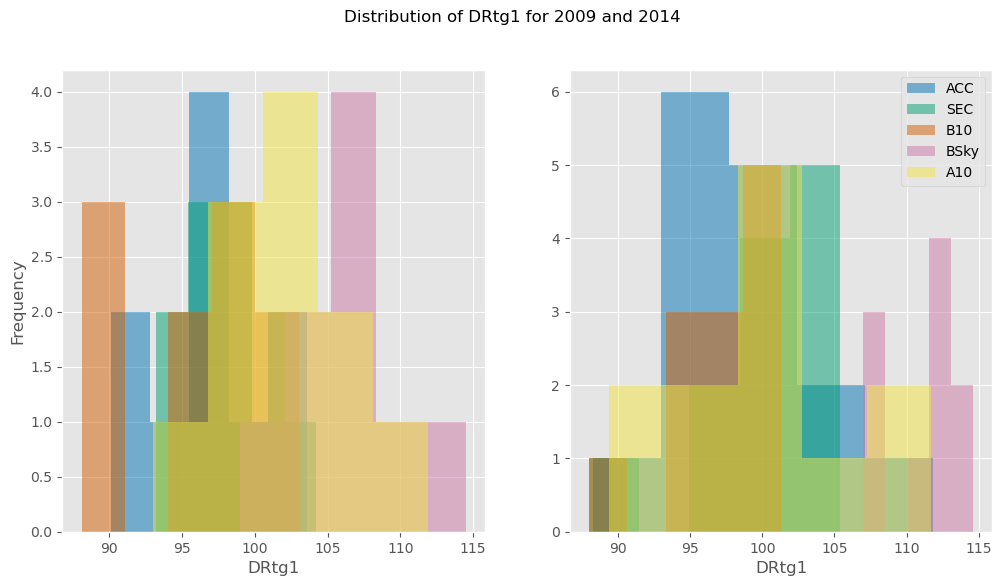

In [92]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-colorblind')

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
conferences = ["ACC", "SEC", "B10", "BSky", "A10"]
BIN_NR = 5
for conf in conferences:
    axs[0].hist(Df_2009["DRtg1"][Df_2009["Conf"] == conf].astype(float), bins=BIN_NR, label=conf, alpha=0.5)
    axs[1].hist(Df_2014["DRtg1"][Df_2014["Conf"] == conf].astype(float), bins=BIN_NR, label=conf, alpha=0.5)

axs[1].legend()
axs[0].set_xlabel('DRtg1')
axs[1].set_xlabel('DRtg1')
axs[0].set_ylabel('Frequency')
fig.suptitle('Distribution of DRtg1 for 2009 and 2014');
